# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [98]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [99]:
cancer_data = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [100]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [101]:
cancer_data.shape
cancer_data.dtypes

(699, 11)

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [104]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [109]:
cancer_data.dtypes
cancer_data['Bare Nuclei'] = cancer_data['Bare Nuclei'].astype('int64')


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [110]:
# We could see "?" values in column, this should be removed from data set
cancer_data.isna().sum()
# Check for missing value in any other column

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [111]:
cancer_data.isna().any

<bound method DataFrame.any of         ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    False           False      False       False              False   
1    False           False      False       False              False   
2    False           False      False       False              False   
3    False           False      False       False              False   
4    False           False      False       False              False   
5    False           False      False       False              False   
6    False           False      False       False              False   
7    False           False      False       False              False   
8    False           False      False       False              False   
9    False           False      False       False              False   
10   False           False      False       False              False   
11   False           False      False       False              False   
12   False           False      F

In [112]:
cancer_data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [113]:
cancer_data['Bare Nuclei'].mode()

0    1
dtype: object

In [114]:
#as the mode is 1 we are replacing the mode to ?

In [115]:
cancer_data['Bare Nuclei'] = cancer_data['Bare Nuclei'].replace(to_replace='?', value = '1')

In [116]:
cancer_data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [131]:

cancer_data['Bare Nuclei'] = cancer_data['Bare Nuclei'].astype('int64')


In [132]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [133]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


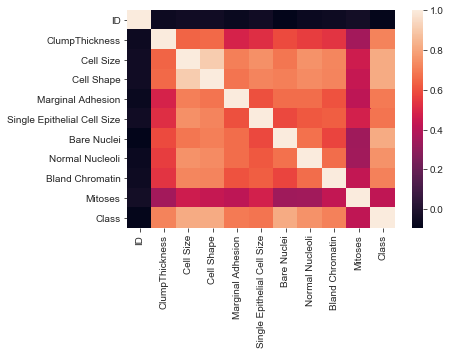

In [134]:
# Check for correlation of variable
sns.heatmap(data= cancer_data.corr())

In [135]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


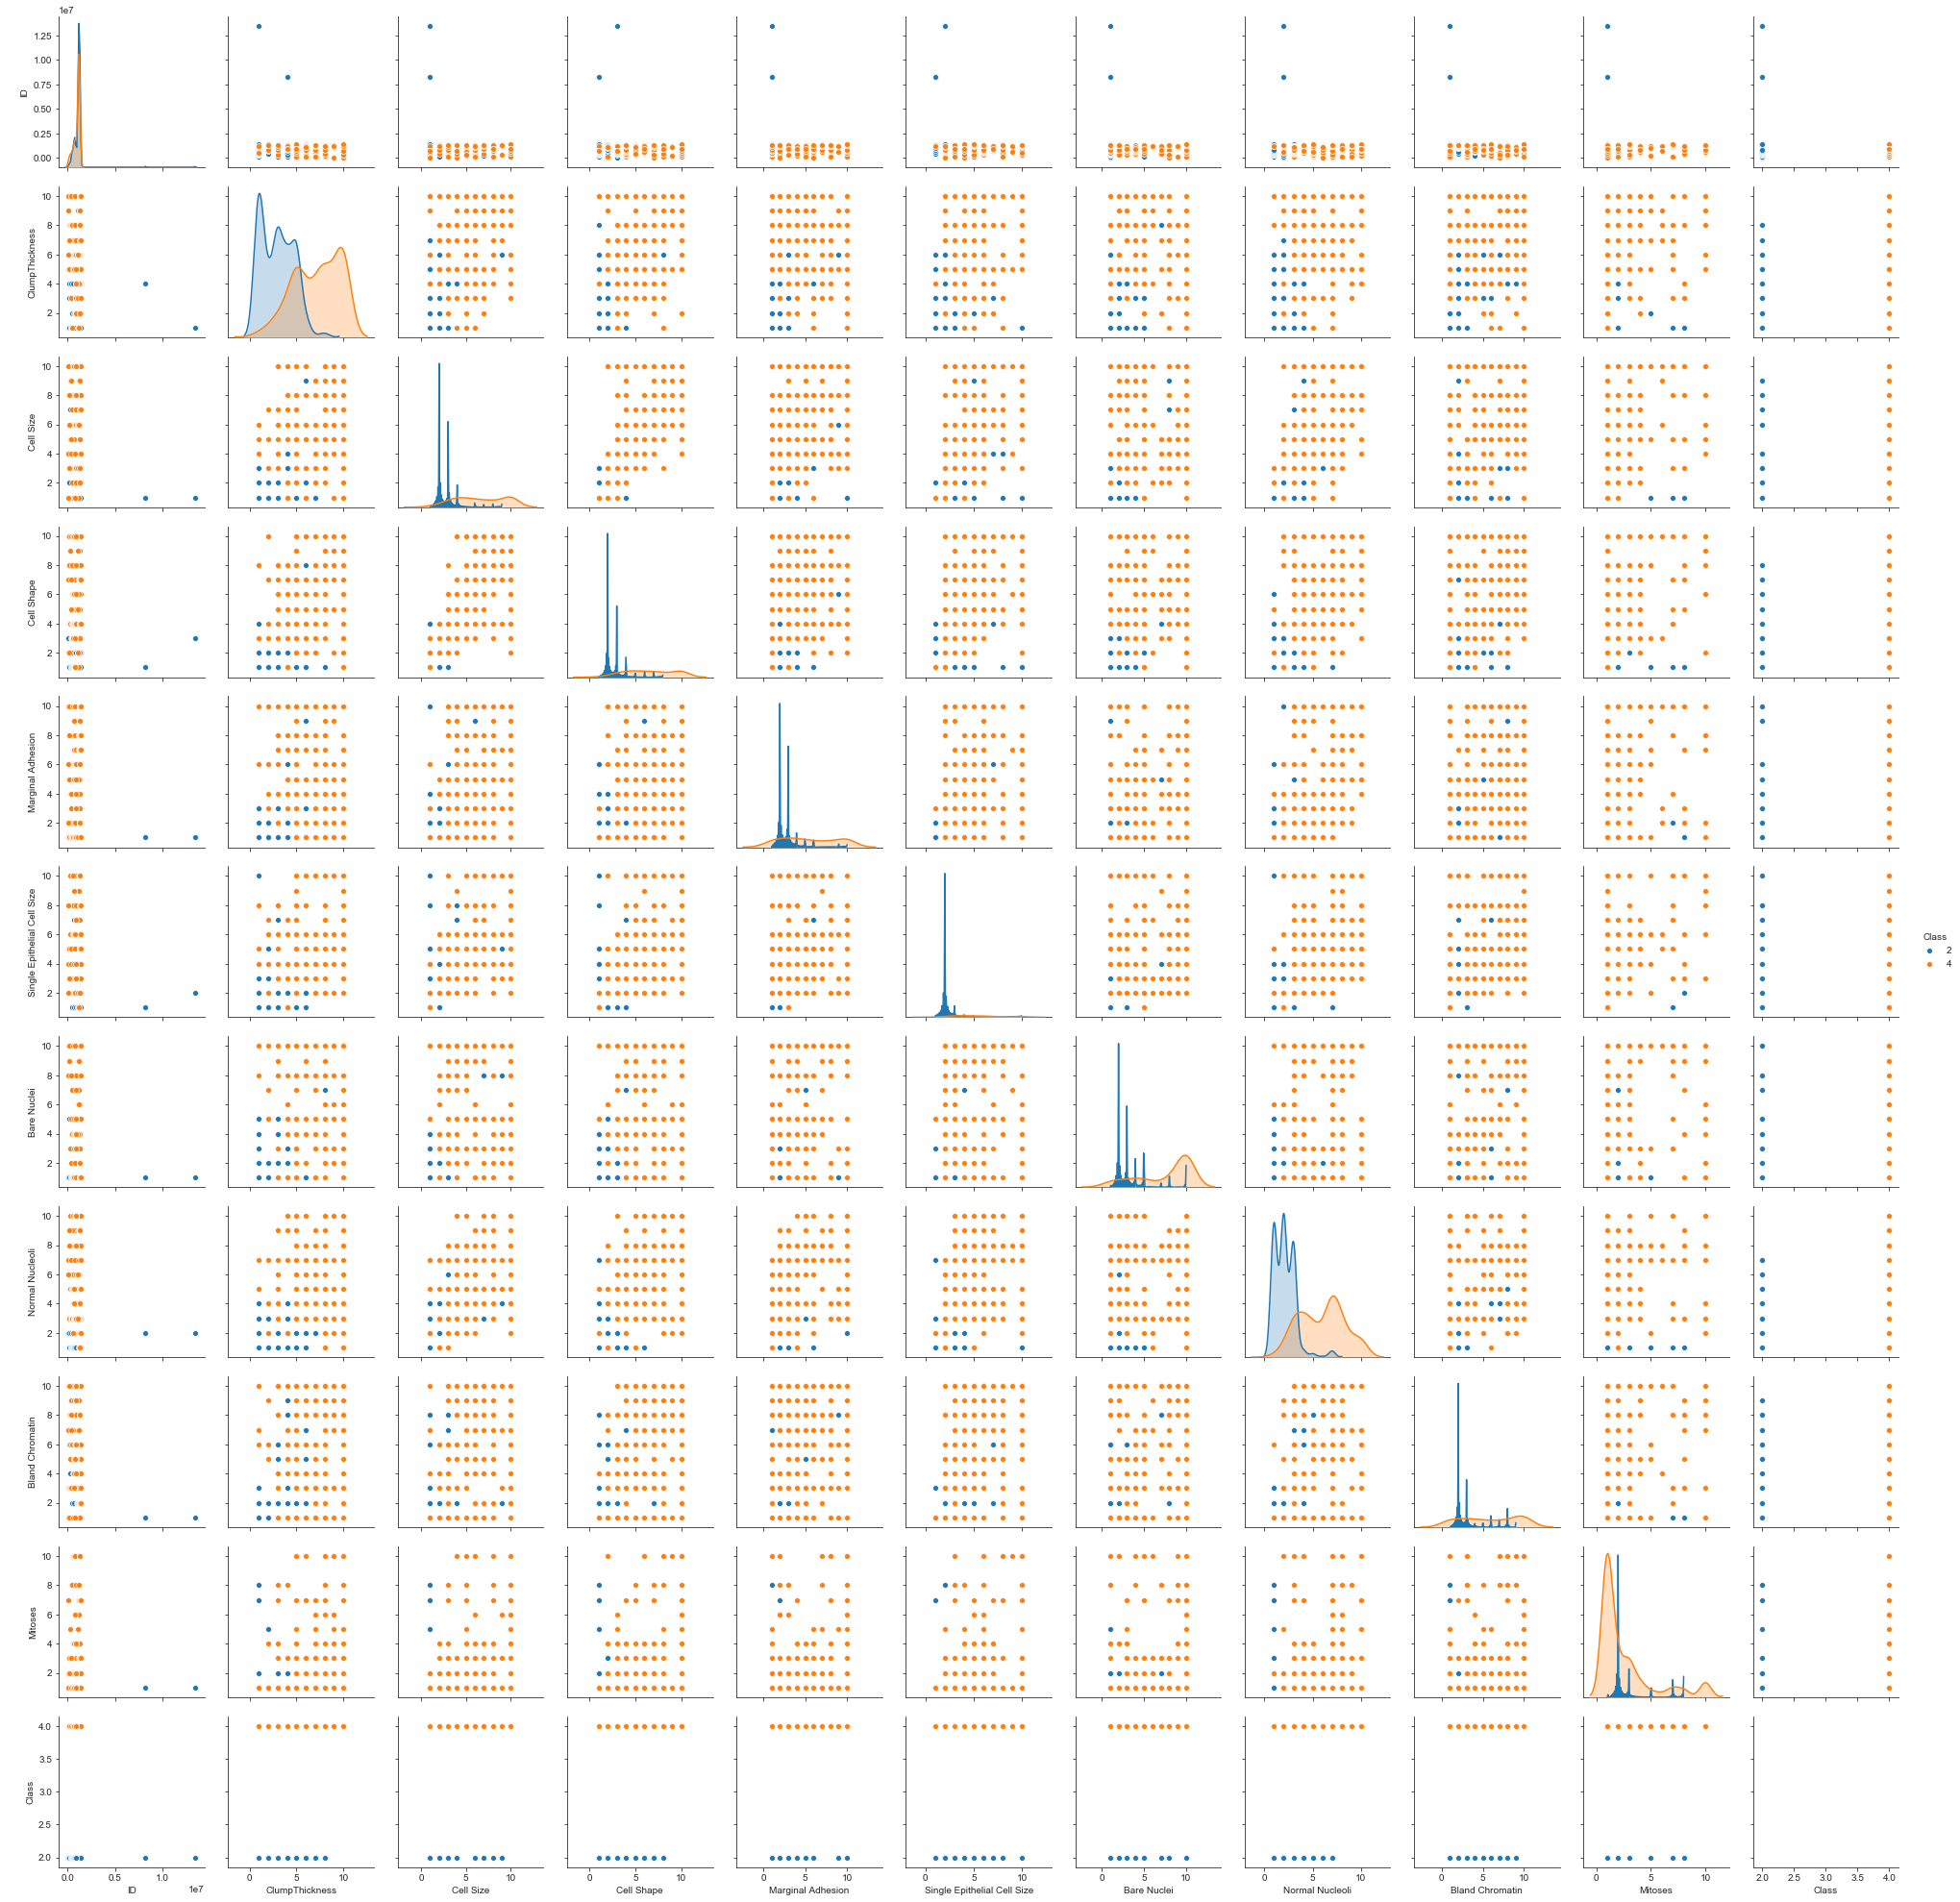

In [136]:
#Let us check for pair plots
sns.pairplot(cancer_data,hue = 'Class')

In [137]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [138]:
# We could see most of the outliers are now removed.
#sns.boxplot(data=cancer_data,hue='Class')
cancer_data_without_class = cancer_data.drop(columns=['ID','Class'])

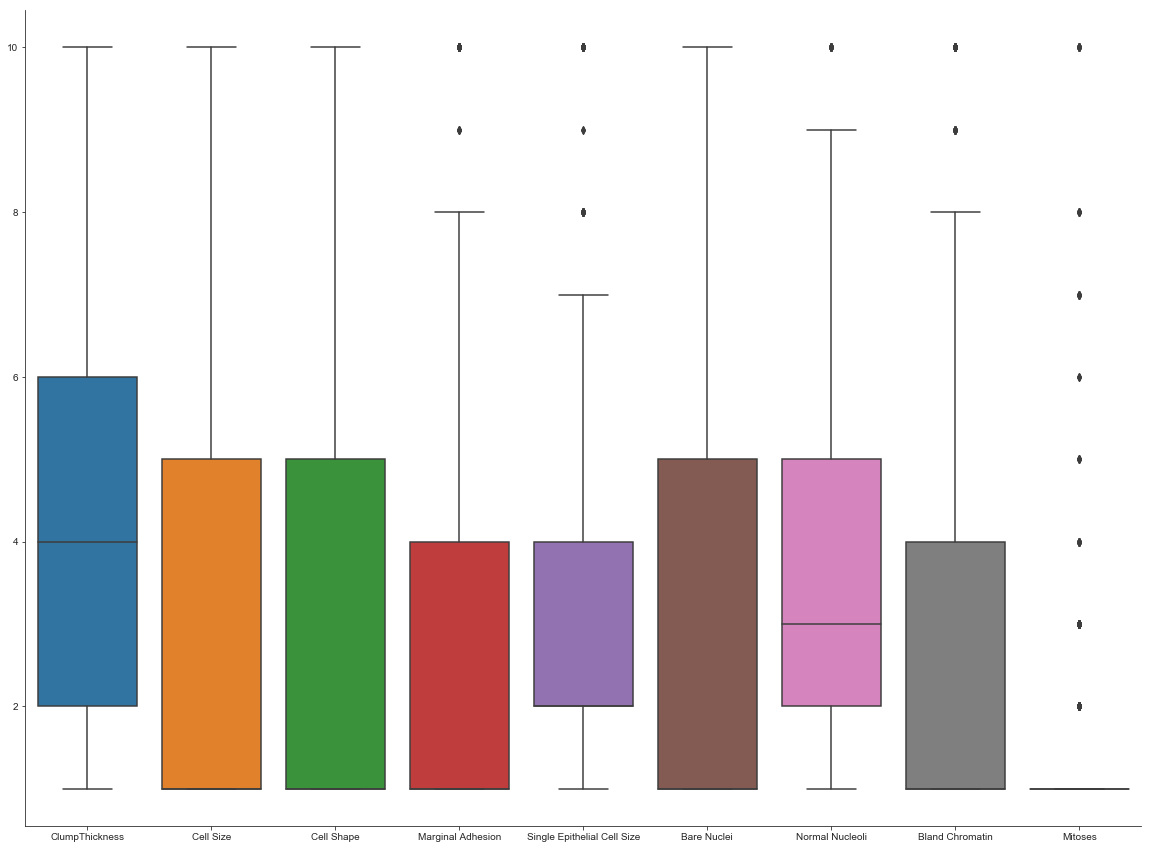

In [139]:

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.boxplot(data=cancer_data_without_class, ax=ax)    
sns.despine()

In [140]:
#defining function to calculate IQR for each column passing to function
#def IQR(columnName):
 #   lower_range = cancer_data_without_class[columnName].quantile(0.25)
  #  higer_range = cancer_data_without_class[columnName].quantile(0.75)
   # interQR = higer_range - lower_range
   # return IQR()
Q1 = cancer_data_without_class.quantile(0.25)
Q3 = cancer_data_without_class.quantile(0.75)
print("lower range of all columns \n",Q1)
print("\n \n")
print("higher range of all columns \n",Q3)


lower range of all columns 
 ClumpThickness                 2.0
Cell Size                      1.0
Cell Shape                     1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Normal Nucleoli                2.0
Bland Chromatin                1.0
Mitoses                        1.0
Name: 0.25, dtype: float64

 

higher range of all columns 
 ClumpThickness                 6.0
Cell Size                      5.0
Cell Shape                     5.0
Marginal Adhesion              4.0
Single Epithelial Cell Size    4.0
Bare Nuclei                    5.0
Normal Nucleoli                5.0
Bland Chromatin                4.0
Mitoses                        1.0
Name: 0.75, dtype: float64


In [141]:
#based on the above two data Q1 and Q3 it is clear that the column that needs to be treated is the Mitoses column only as
#lower range and upper range are only 1
#lets see how the crosstabs looks for the above columns
print(pd.crosstab(index=cancer_data_without_class['Mitoses'],columns=cancer_data['Class']))
print("\n")
print(pd.crosstab(index=cancer_data_without_class['Bland Chromatin'],columns=cancer_data['Class']))
print("\n")
print(pd.crosstab(index=cancer_data_without_class['Marginal Adhesion'],columns=cancer_data['Class']))

Class      2    4
Mitoses          
1        445  134
2          8   27
3          2   31
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14


Class              2   4
Bland Chromatin         
1                402  41
2                 30   6
3                 12  32
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  4  20
9                  1  15
10                 0  61


Class                2   4
Marginal Adhesion         
1                  375  32
2                   37  21
3                   31  27
4                    5  28
5                    4  19
6                    4  18
7                    0  13
8                    0  25
9                    1   4
10                   1  54


In [142]:
# treating the columns Mitosis with IRQ or replacing values below 4 as 4
cancer_data_without_class['Mitoses'] = np.where(cancer_data_without_class['Mitoses']>4, 4, cancer_data_without_class['Mitoses'])

In [143]:
cancer_data_without_class['Mitoses'].value_counts()

1    579
4     52
2     35
3     33
Name: Mitoses, dtype: int64

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_cancer_data = (scaler.fit(cancer_data_without_class))
transfor_cancer = scaler.transform(cancer_data_without_class)

In [145]:
transfor_cancer

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.41811231],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.41811231],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.41811231],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.71908809],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.41811231],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.41811231]])

# Q6 Create a covariance matrix for identifying Principal components

In [146]:
# PCA
# Step 1 - Create covariance matrix
np.cov(transfor_cancer)

array([[ 0.09652219, -0.08051826,  0.02836513, ..., -0.09544626,
        -0.01781712, -0.04703807],
       [-0.08051826,  0.66487614, -0.01168041, ..., -0.31229997,
        -0.29465739, -0.11975845],
       [ 0.02836513, -0.01168041,  0.03028298, ..., -0.05017103,
         0.0373994 ,  0.02433923],
       ...,
       [-0.09544626, -0.31229997, -0.05017103, ...,  1.06806425,
         0.62008876,  0.54364548],
       [-0.01781712, -0.29465739,  0.0373994 , ...,  0.62008876,
         0.99176837,  0.91080701],
       [-0.04703807, -0.11975845,  0.02433923, ...,  0.54364548,
         0.91080701,  0.97395608]])

In [154]:
transpose = transfor_cancer.T
w,v = np.linalg.eig(np.cov(transpose))
print(w,v)

[5.96647287 0.69279683 0.54141562 0.08857652 0.48197983 0.3846101
 0.26237544 0.30655033 0.28811644] [[-0.30151106  0.12639826 -0.86705337 -0.00394971 -0.01780862  0.04315703
  -0.24131609  0.28266251  0.03172061]
 [-0.37851541  0.08708794  0.03750598 -0.73524101  0.20223761 -0.11862498
   0.45280196  0.10106559 -0.1921976 ]
 [-0.37449107  0.1358317  -0.01835348  0.66531488  0.17469911 -0.08872954
   0.58996605  0.03268289 -0.1039453 ]
 [-0.33132033  0.00978019  0.38743605  0.04185714 -0.47602586 -0.02641433
  -0.1192403   0.68474417  0.16697695]
 [-0.33318486 -0.10496457  0.15969222  0.06342584  0.43602621 -0.65198464
  -0.44921234 -0.09128167  0.15204919]
 [-0.3331899   0.16868387 -0.05974714 -0.07571447 -0.57048661 -0.14441156
   0.07852243 -0.60323562  0.36723177]
 [-0.34345864  0.27425001  0.18519986  0.06302859 -0.08097205  0.26788845
  -0.39271281 -0.22304297 -0.69732295]
 [-0.33399206 -0.02369002  0.15641858 -0.02364213  0.39567124  0.67031557
  -0.10042935 -0.08430133  0.48968

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [ ]:
# got the eigen values and vector in above step

# Q8 Find variance and cumulative variance by each eigen vector

In [162]:
print(np.cumsum((w/w.sum())*100))

[ 66.19930162  73.88603165  79.89315453  80.8759301   86.22360014
  90.49093206  93.40204408  96.80328602 100.        ]


In [165]:
#taking 95% data for calculation of PCA so the number of components will be 8

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [166]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(n_components=8)
pca.fit(transfor_cancer)
X_pca = pca.transform(transfor_cancer)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [169]:
X_pca

array([[-1.47477144, -0.14887191, -0.57445023, ...,  0.1296483 ,
         0.31460408,  0.42455616],
       [ 1.43126043, -0.55998479,  0.25058543, ..., -0.51190771,
        -1.042612  ,  0.40298735],
       [-1.59702763, -0.10563415,  0.02534468, ..., -0.23793878,
         0.23568731,  0.23133312],
       ...,
       [ 3.92470365, -0.12943076,  0.81637343, ..., -0.35751728,
         0.74553292, -0.59571974],
       [ 2.2265732 , -1.38428221,  1.00724846, ..., -0.28399719,
         1.59434089, -0.13789661],
       [ 2.61861916, -1.49388194,  1.08381348, ..., -0.17467684,
         1.75659506, -0.3779242 ]])

In [181]:
pca.components_

array([[ 0.30151106,  0.37851541,  0.37449107,  0.33132033,  0.33318486,
         0.3331899 ,  0.34345864,  0.33399206,  0.25349211],
       [-0.12639826, -0.08708794, -0.1358317 , -0.00978019,  0.10496457,
        -0.16868387, -0.27425001,  0.02369002,  0.91795816],
       [-0.86705337,  0.03750598, -0.01835348,  0.38743605,  0.15969222,
        -0.05974714,  0.18519986,  0.15641858, -0.09236412],
       [ 0.01780862, -0.20223761, -0.17469911,  0.47602586, -0.43602621,
         0.57048661,  0.08097205, -0.39567124,  0.15157957],
       [-0.04315703,  0.11862498,  0.08872954,  0.02641433,  0.65198464,
         0.14441156, -0.26788845, -0.67031557, -0.09202767],
       [ 0.28266251,  0.10106559,  0.03268289,  0.68474417, -0.09128167,
        -0.60323562, -0.22304297, -0.08430133, -0.10423272],
       [-0.03172061,  0.1921976 ,  0.1039453 , -0.16697695, -0.15204919,
        -0.36723177,  0.69732295, -0.4896845 ,  0.19834219],
       [ 0.24131609, -0.45280196, -0.58996605,  0.1192403 ,  0

In [182]:
pca.explained_variance_

array([5.96647287, 0.69279683, 0.54141562, 0.48197983, 0.3846101 ,
       0.30655033, 0.28811644, 0.26237544])

# Q10 Find correlation between components and features

In [190]:

#print(columns)
#1new_cols  = columns.delete('Mitoses', 'Bare Nuclei')
corr_df = pd.DataFrame(pca.components_)
corr_df.columns=cancer_data_without_class.columns
corr_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.301511,0.378515,0.374491,0.331320,0.333185,0.333190,0.343459,0.333992,0.253492
1,-0.126398,-0.087088,-0.135832,-0.009780,0.104965,-0.168684,-0.274250,0.023690,0.917958
2,-0.867053,0.037506,-0.018353,0.387436,0.159692,-0.059747,0.185200,0.156419,-0.092364
3,0.017809,-0.202238,-0.174699,0.476026,-0.436026,0.570487,0.080972,-0.395671,0.151580
4,-0.043157,0.118625,0.088730,0.026414,0.651985,0.144412,-0.267888,-0.670316,-0.092028
5,0.282663,0.101066,0.032683,0.684744,-0.091282,-0.603236,-0.223043,-0.084301,-0.104233
6,-0.031721,0.192198,0.103945,-0.166977,-0.152049,-0.367232,0.697323,-0.489685,0.198342
7,0.241316,-0.452802,-0.589966,0.119240,0.449212,-0.078522,0.392713,0.100429,-0.046817


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [240]:
jokes = pd.read_csv("jokes.csv")


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [248]:

ratings = jokes.head(200)
ratings = ratings.drop(columns=['NumJokes'])
ratings.shape
ratings.head()

(200, 100)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [249]:
ratings.columns = (range(0,100))

In [250]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [259]:

ratings.replace(99.00,0, inplace = True)
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ratings_fit = (scaler.fit(ratings))
ratings_diff = scaler.transform(ratings)
ratings_diff = pd.DataFrame(ratings_diff)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [253]:
ratings_diff.mean(axis = 0)

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

In [254]:
mean_df = pd.DataFrame(ratings_diff.mean(axis = 0))

In [255]:
mean_df

,0
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18
5,-2.636780e-18
6,-1.665335e-18
7,2.331468e-17
8,-4.329870e-17
9,-2.553513e-17


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [256]:
print(mean_df.nlargest(10,mean_df[:]))

               0
98  1.840889e-16
81  1.243450e-16
97  1.198694e-16
20  1.065814e-16
94  1.054712e-16
92  8.770762e-17
47  7.771561e-17
73  7.743806e-17
99  7.549517e-17
49  7.494005e-17
